<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter4/PCAdat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version
!rm pcadat.*
!wget https://raw.github.com/gnitnaw/Programs/master/Chapter4/pcadat.csv

Python 3.7.12
rm: cannot remove 'pcadat.*': No such file or directory
--2021-10-27 18:28:00--  https://raw.github.com/gnitnaw/Programs/master/Chapter4/pcadat.csv
Resolving raw.github.com (raw.github.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter4/pcadat.csv [following]
--2021-10-27 18:28:00--  https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter4/pcadat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243 [text/plain]
Saving to: ‘pcadat.csv’

pcadat.csv          100%[===================>]     243  --.-KB/s    in

# Example 4.11
## Import modules

In [2]:
import numpy as np
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(120)

## Original Program

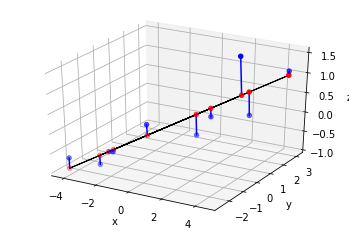

In [4]:
X = np.genfromtxt('pcadat.csv', delimiter=',')
n = X.shape[0]

# Gram matrix
X = X - X.mean(axis=0)
G = X.T @ X 
U, _ , _ = np.linalg.svd(G/n)

# projected points
Y = X @ np.outer(U[:,0],U[:,0])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((0, 0, 0, 0))
ax.plot(Y[:,0], Y[:,1], Y[:,2], c='k', linewidth=1)
ax.scatter(X[:,0], X[:,1], X[:,2], c='b')
ax.scatter(Y[:,0], Y[:,1], Y[:,2], c='r')

for i in range(n):
    ax.plot([X[i,0], Y[i,0]], [X[i,1],Y[i,1]], [X[i,2],Y[i,2]], 'b')
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.savefig('pca1py.pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%